In [10]:
import pandas as pd
from ggplot import *

# not sure if this is needed anymore
import matplotlib.pyplot as plt
%matplotlib inline

project_id = "the-d-team-164512"

Mercadis went out of patent in 2014 ... LINK please ... let's analyse the impact.

In [19]:
query = """\
SELECT
  DATE(t.Dispense_Week) AS dispense_week
  , SUM(d.PackSizeNumber) AS pill_count
  , COUNT(*) AS transaction_count
  , SUM(t.PatientPrice_amt) as patient_amt
  , SUM(t.WholesalePrice_amt) as wholesale_amt
  , SUM(t.GovernmentReclaim_amt) AS gov_amt
FROM [the-d-team-164512:dthon.transactions] t
JOIN [the-d-team-164512:dthon.drug_lookup] d
ON t.Drug_ID = d.MasterProductID
WHERE
    d.BrandName = 'MICARDIS'
    GROUP By Dispense_Week
ORDER BY transaction_count DESC
"""

df_1 = pd.read_gbq(query, project_id)
df_1.dispense_week = pd.Series(df_1.dispense_week).apply(pd.to_datetime, format='%Y-%m-%d')
df_1.head(3)

Requesting query... ok.
Query running...
Query done.
Processed: 2.2 Gb

Retrieving results...
Got 325 rows.

Total time taken 3.66 s.
Finished at 2017-04-22 18:56:47.


,dispense_week,pill_count,transaction_count,patient_amt,wholesale_amt,gov_amt
0,2013-12-15,121464,4338,32533.57,56792.19,63817.10
1,2012-12-16,120680,4310,35368.32,67102.50,71919.06
2,2011-12-18,117180,4185,26880.01,68791.80,77436.01


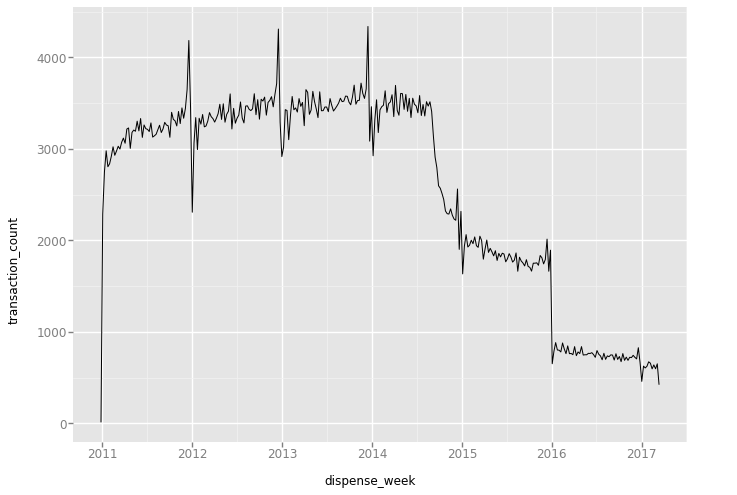

<ggplot: (115399798953)>

In [18]:
ggplot(aes(x='dispense_week', y='transaction_count'), data=df_1) + geom_line()

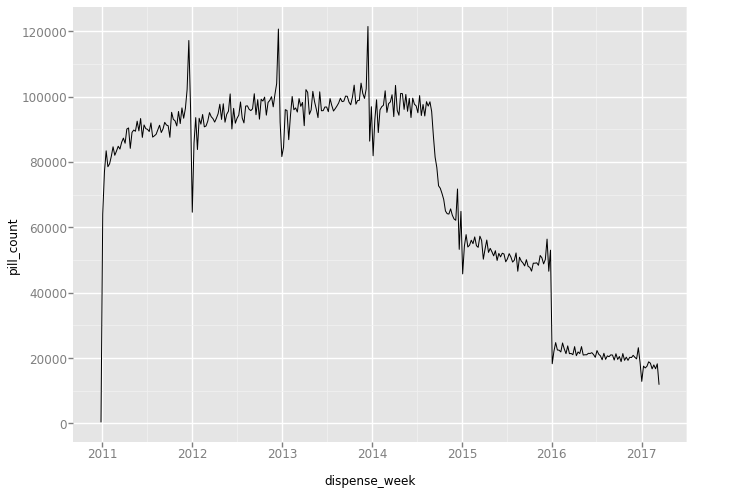

<ggplot: (115396830328)>

In [17]:
ggplot(aes(x='dispense_week', y='pill_count'), data=df_1) + geom_line()

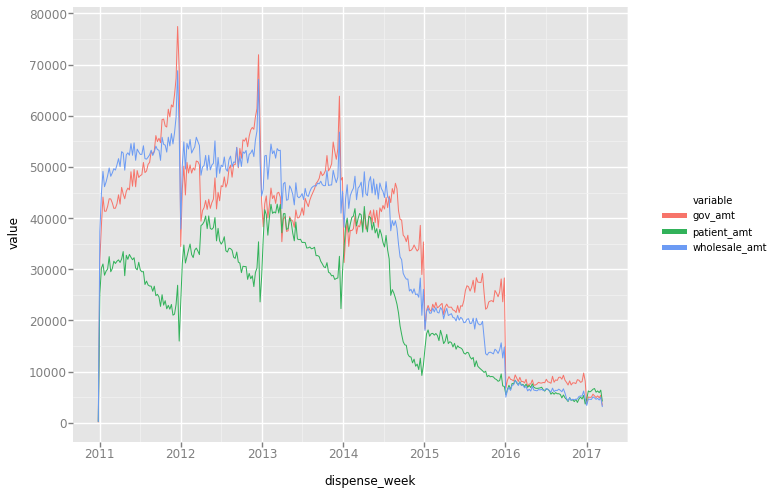

<ggplot: (-9223371921454949916)>

In [37]:
df_1_lng = pd.melt(df_1, id_vars='dispense_week', value_vars=['patient_amt', 'wholesale_amt', 'gov_amt'])
df_1_lng
ggplot(aes(x='dispense_week', y='value', colour='variable'), data=df_1_lng) + geom_line()